<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データサイエンス基礎-第8回" data-toc-modified-id="データサイエンス基礎-第8回-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データサイエンス基礎 第8回</a></span><ul class="toc-item"><li><span><a href="#復習：データの読みこみ" data-toc-modified-id="復習：データの読みこみ-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>復習：データの読みこみ</a></span></li><li><span><a href="#単回帰分析" data-toc-modified-id="単回帰分析-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>単回帰分析</a></span><ul class="toc-item"><li><span><a href="#注意" data-toc-modified-id="注意-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>注意</a></span></li></ul></li><li><span><a href="#線形単回帰分析" data-toc-modified-id="線形単回帰分析-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>線形単回帰分析</a></span><ul class="toc-item"><li><span><a href="#関数について" data-toc-modified-id="関数について-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>関数について</a></span></li></ul></li><li><span><a href="#最小二乗法" data-toc-modified-id="最小二乗法-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>最小二乗法</a></span></li><li><span><a href="#決定係数" data-toc-modified-id="決定係数-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>決定係数</a></span></li></ul></li><li><span><a href="#練習問題" data-toc-modified-id="練習問題-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>練習問題</a></span></li></ul></div>

# データサイエンス基礎 第8回

記述統計の次は推論統計の一つ、**回帰分析**を学びます。

回帰分析とは、数値を予測する分析です。

## 復習：データの読みこみ

In [3]:
import pandas as pd
student_data_math = pd.read_csv('./student/student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 単回帰分析

前回、学生データについて、1学期目の数学の成績と最終期の数学の成績をグラフ化（散布図）しました。

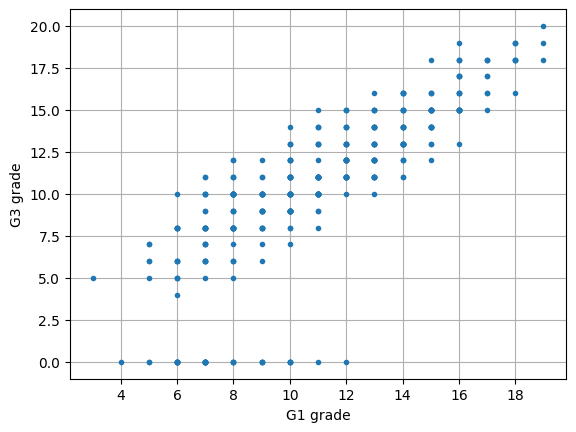

In [4]:
import matplotlib.pyplot as plt
plt.plot(student_data_math['G1'], student_data_math['G3'], '.')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid()

回帰を行う時は、与えられたデータから関係式を仮定して、データに最も当てはまる計数を求めていきます。

具体的には予めわかっているG1を元に、G3の成績を予測します。

- **目的変数**：他の変数（説明変数）によって影響を受けたり、説明されたりする結果の変数。

- **説明変数**：目的変数の原因となったり、目的変数を説明・予測するために使われる変数。

回帰分析の手法は、アウトプット（目的変数）とインプット（説明変数）の関係において、インプットが1変数のものと、2変数以上あるもので、大きく分けられます。

前者を**単回帰分析**、後者を重回帰分析と言います。

この授業では単回帰分析のみ扱います。

### 注意

Pythonを使って回帰分析する場合、統計の知識がなくてもScikit-learnというライブラリを利用することで計算できるので、

ここでは計算の方法を学習することにします。

ただ、この釧路高専のJupyterNotebook環境では**Python3.11にScikit-learnが入っていません。**

Scikit-learnが必要な時は必ずノートブックを**「Python 3」**で作成するようにしてください。

Python3.11で作ってしまった場合は「Kernel」→「Change Kernel」→「Python 3」を選択すると変更できます。

In [1]:
#エラーが出ないか確かめてみよう
from sklearn import linear_model

## 線形単回帰分析

ここでは単回帰分析のうちでも、

アウトプットとインプットが線形の関係に成り立つ（$y=ax+b$）ことを前提とした線形単回帰という手法で回帰問題を解く方法を説明します。

### 関数について

少し話題を変えて、関数について考えてみましょう。

みなさんは、関数と聞くとどのようなものを思い浮かべますか。
これまでに習ってきたイメージでかまいません。

ここでは、関数を次のように考えると分かりやすくなります。

> **関数とは、「入力」として数字を受け取り、**
> 
> **それに対応した「出力」を返してくれる機械である**

という考え方です。

では、ここでクイズです。次の機械は、どんな機械だと思いますか？

左から入っている矢印が入力で、出ていく矢印が出力です。答えは日本語でも、式でも良いです。

<img src="./picture/mondai1.png" width="30%">

答え： $y=x^2$

<img src="./picture/mondai2.png" width="30%">

答え： $y=3x+1$

<img src="./picture/mondai3.png" width="30%">

答え： $y=\cos(x)$

<img src="./picture/mondai4.png" width="30%">

答え： $y=5$

これらはすべて、
数字$x$を入れると、決まったルールにしたがって数字$y$が出てくる**関数**です。

このように、これまでに学んできた関数は、「数字を入力すると、数字を出力する仕組み」として捉えることができます。

今回は、この中でも特に一次関数に注目して話を進めていきます。

## 最小二乗法

前回のプロットしたG1とG3の関係には正の相関がありました。

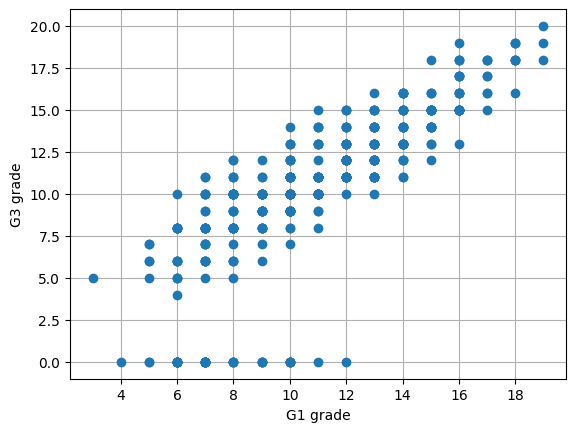

In [5]:
import matplotlib.pyplot as plt
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)
plt.show()

これらのデータを使って、それらしい予測を行う1次関数（$y=ax+b$）を作るのが目標になります。

このときこの $a$ を**回帰係数**、$b$ を**切片**と呼びます。

データを全て通るような直線 $y=ax+b$ を引ければ良いのですが、それは不可能なのでデータの最も中心を通るような線を引くことを考えます。

これを**最小二乗法**といいます。（以下、イメージ図）

<img src="./picture/saisyoujijouhou.png" width="50%">

PythonのScikit-learnライブラリを使うと最小二乗法を計算することができます。

ここでは具体的な計算方法については割愛しますが、内部ではそれぞれの値との距離が最小になるように微分を使って式を導出しています。

In [6]:
from sklearn import linear_model
import matplotlib.pyplot as plt

x = student_data_math[['G1']]
y = student_data_math['G3']

reg = linear_model.LinearRegression()

reg.fit(x, y)

a = reg.coef_
b = reg.intercept_

print (a, b)

[1.10625609] -1.652803828800458


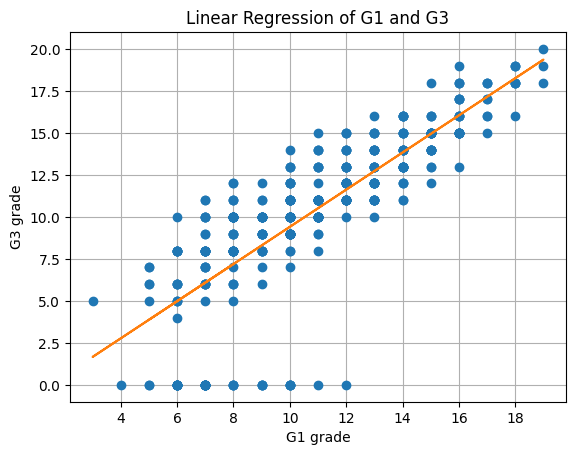

In [10]:
plt.plot(x, y, 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

plt.plot(x, a*x+b)
plt.title('Linear Regression of G1 and G3')
plt.show()



## 決定係数

グラフを見ると予測値は実測値をうまく予測しているように見えますが、これは客観的に見てどうなのかの判断はつきません。

そこでそれを数値化したものが**決定係数**です。これは寄与率とも呼ばれます。
定義は以下です。

$$
R^2 = 1 - \frac{\sum_{i=1}^n(y_i-f(x_i))^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}
$$

決定係数 $R^2$ が客観的になる理由は，

**「何も考えずに平均だけを使う予測」と比べて，そのモデルがどれだけ誤差を減らせたか」を割合で測っているから**

です。

分母は、「どんな数を与えても平均を出力するようなカス推論マシン」の誤差の合計を表しています。

分子は、「作成したモデル（今回だと一次関数の式）」の誤差の合計を表しています。

それらの比をとって、平均だけを返す雑なモデルと作ったモデルの差でモデルの良さを数字で表しています。

決定係数は最大で $1$ の値を取り、$1$ に近ければ近いほど良いモデルになります。

Pythonで決定係数を求めるには、scoreを使って以下のようにします。

In [ ]:
print('決定係数：', reg.score(x,y))

# 練習問題

1. ポルトガル語の成績データである`student-por.csv`のデータを使って、G3を目的変数、G1を説明変数として単回帰分析を実施し、回帰計数、切片、決定係数を求めてください

In [15]:
student_data_por = pd.read_csv('./student/student-por.csv', sep=';')

x = student_data_por[['G1']] 
y = student_data_por['G3']

reg = linear_model.LinearRegression()
reg.fit(x, y)

a = reg.coef_
b = reg.intercept_
c = reg.score(x, y)

print('回帰係数', a)
print('切片', b)
print('決定係数', c)



回帰係数 [0.97250087]
切片 0.8203984121064511
決定係数 0.6829156800171083


2. 1番のデータの実際の散布図と、回帰直線を合わせてグラフ化してみましょう

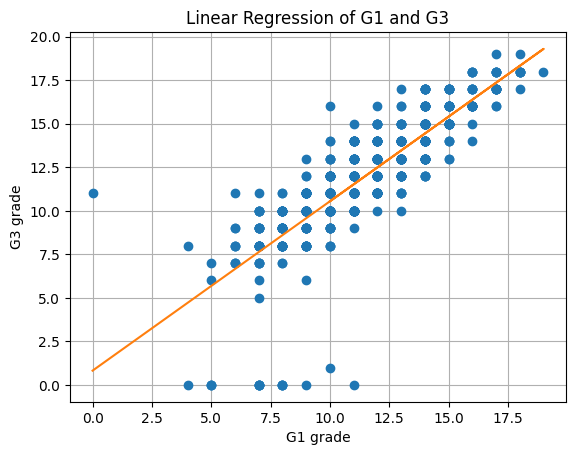

In [16]:
plt.plot(x, y, 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

plt.plot(x, a*x+b)
plt.title('Linear Regression of G1 and G3')
plt.show()

3. `student-por.csv`のデータを使って、G3を目的変数、absences（欠席数）を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。また、グラフ化してみましょう。そして、この結果を見て考察してみましょう。

回帰係数 [-0.06361337]
切片 12.138800862687443
決定係数 0.008350131955637385


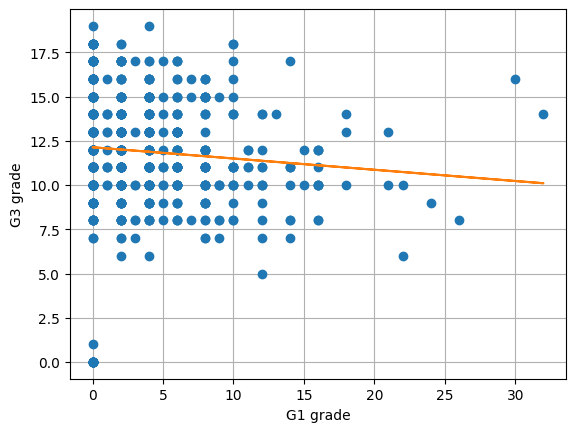

In [17]:
x = student_data_por[['absences']]
y = student_data_por['G3']

reg = linear_model.LinearRegression()
reg.fit(x, y)

a = reg.coef_
b = reg.intercept_
c = reg.score(x, y)

print('回帰係数', a)
print('切片', b)
print('決定係数', c)


plt.plot(x, y, 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

plt.plot(x, a*x+b)
plt.show()



回帰係数が負の値であるから，欠席が増えると成績が下がるという負の相関が示されている
しかし決定係数は非常に低い値を示しているため，あまり信頼できない
